# A Comparison of GaussianProcesses vs. GaussianProcesses2

In [1]:
using GaussianProcesses, GaussianProcesses2
using BenchmarkTools
using Plots; pyplot()

Plots.PyPlotBackend()

In [14]:
# Training data
srand(1989874)
n = 10;                             # number of training points
ν = 0.05                            # noise variance
X = 2π * rand(n);                   # design points
y = sin.(X) + sqrt(ν)*randn(n);     # observed objective values
l = 2.0;                            # length scale
X_pred = collect(linspace(0.0,2π,20));

## GaussianProcesses

In [15]:
m1 = MeanZero()                         #Zero mean function
k1 = SE(log(l),log(1.0))                #Squared exponential kernel (note that hyperparameters are on the log scale)
gp1 = GP(X,y,m1,k1,log(sqrt(ν))) 

GP Exact object:
  Dim = 1
  Number of observations = 10
  Mean function:
    Type: GaussianProcesses.MeanZero, Params: Float64[]
  Kernel:
    Type: GaussianProcesses.SEIso, Params: [0.693147, 0.0]
  Input observations = 
[5.61236 3.4429 … 0.312386 0.177343]
  Output observations = [-1.06191, -0.330957, -1.40487, -0.0105029, 1.32186, -1.19, -0.940435, -0.878197, 0.18825, 0.295108]
  Variance of observation noise = 0.05
  Marginal Log-Likelihood = -10.317

In [16]:
μ1, S = predict_f(gp1, X_pred)
sig1 = sqrt.(S)
collect(zip(μ1,sig1))

20-element Array{Tuple{Float64,Float64},1}:
 (0.109525, 0.184591)  
 (0.388583, 0.147156)  
 (0.658049, 0.148912)  
 (0.884448, 0.166202)  
 (1.03564, 0.18171)    
 (1.08603, 0.191307)   
 (1.02131, 0.19625)    
 (0.84168, 0.198093)   
 (0.562953, 0.196823)  
 (0.215101, 0.191297)  
 (-0.161602, 0.180639) 
 (-0.522234, 0.165291) 
 (-0.823737, 0.147153) 
 (-1.03114, 0.128903)  
 (-1.12244, 0.112978)  
 (-1.09126, 0.101613)  
 (-0.947057, 0.0997192)
 (-0.712709, 0.117223) 
 (-0.420327, 0.161211) 
 (-0.105928, 0.229581) 

## GaussianProcesses2

In [17]:
m2 = ZeroMean()  # constant zero mean function
k2 = SquaredExponential(l);  # squared exponential kernel
gp2 = GaussianProcess(m2,k2,X,y,ν)

GaussianProcesses2.GaussianProcess(GaussianProcesses2.ConstMean(0.0), GaussianProcesses2.SquaredExponential(4.0), [5.61236, 3.4429, 4.76937, 5.95345, 1.68196, 4.65533, 5.33721, 4.86471, 0.312386, 0.177343], [-1.06191, -0.330957, -1.40487, -0.0105029, 1.32186, -1.19, -0.940435, -0.878197, 0.18825, 0.295108], 0.05)

In [18]:
μ2, v2 = GaussianProcesses2.predict(gp2, X_pred)
sig2 = sqrt.(v2)
collect(zip(μ2,sig2))

20-element Array{Tuple{Float64,Float64},1}:
 (0.109525, 0.184591)  
 (0.388583, 0.147156)  
 (0.658049, 0.148912)  
 (0.884448, 0.166202)  
 (1.03564, 0.18171)    
 (1.08603, 0.191307)   
 (1.02131, 0.19625)    
 (0.84168, 0.198093)   
 (0.562953, 0.196823)  
 (0.215101, 0.191297)  
 (-0.161602, 0.180639) 
 (-0.522234, 0.165291) 
 (-0.823737, 0.147153) 
 (-1.03114, 0.128903)  
 (-1.12244, 0.112978)  
 (-1.09126, 0.101613)  
 (-0.947057, 0.0997192)
 (-0.712709, 0.117223) 
 (-0.420327, 0.161211) 
 (-0.105928, 0.229581) 

## Visualize

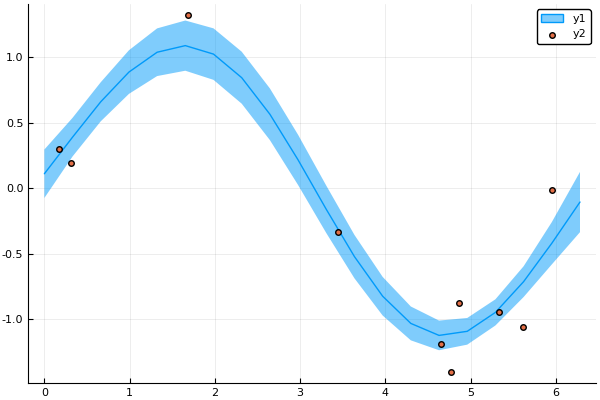

In [19]:
p1 = plot(X_pred, μ1, ribbon=sig1)
plot!(p1, X, y, seriestype=:scatter)

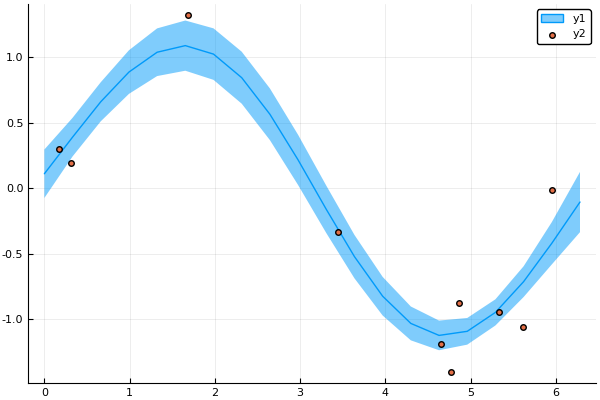

In [20]:
p2 = plot(X_pred, μ2, ribbon=sig2)
plot!(p2, X, y, seriestype=:scatter)

## Error analysis in prediction (difference between the two models)

In [21]:
err_μ = abs.(μ1-μ2)
err_sig = abs.(sig1-sig2)
collect(zip(err_μ, err_sig))

20-element Array{Tuple{Float64,Float64},1}:
 (1.33227e-15, 1.22125e-15)
 (3.33067e-16, 0.0)        
 (1.11022e-16, 0.0)        
 (2.22045e-16, 6.66134e-16)
 (1.77636e-15, 3.05311e-16)
 (6.66134e-16, 3.05311e-16)
 (4.44089e-16, 2.77556e-16)
 (2.22045e-16, 5.55112e-16)
 (8.88178e-16, 2.77556e-16)
 (1.7486e-15, 2.77556e-16) 
 (1.47105e-15, 9.15934e-16)
 (8.88178e-16, 3.60822e-16)
 (1.66533e-15, 3.88578e-16)
 (3.55271e-15, 8.60423e-16)
 (1.55431e-15, 9.85323e-16)
 (8.88178e-16, 1.08247e-15)
 (1.44329e-15, 5.55112e-16)
 (6.66134e-16, 0.0)        
 (1.05471e-15, 0.0)        
 (4.16334e-16, 4.996e-16)  

In [22]:
maximum(err_μ), maximum(err_sig)

(3.552713678800501e-15, 1.2212453270876722e-15)

## Computation time

In [23]:
# Training data
srand(1989874)
n = 1000;                             # number of training points
X = 2π * rand(n);                   # design points
y = sin.(X) + sqrt(ν)*randn(n);     # observed objective values

In [24]:
@benchmark begin
    gp1 = GP($X,$y,$m1,$k1,$log(sqrt(ν)))
    predict_f(gp1, $X_pred);
end

BenchmarkTools.Trial: 
  memory estimate:  31.04 MiB
  allocs estimate:  650
  --------------
  minimum time:     44.500 ms (2.93% GC)
  median time:      50.234 ms (10.95% GC)
  mean time:        51.746 ms (11.31% GC)
  maximum time:     65.152 ms (13.39% GC)
  --------------
  samples:          97
  evals/sample:     1

In [25]:
@benchmark begin 
    gp2 = GaussianProcess($m2,$k2,$X,$y,$ν);
    GaussianProcesses2.predict(gp2, $X_pred)
end

BenchmarkTools.Trial: 
  memory estimate:  31.32 MiB
  allocs estimate:  80
  --------------
  minimum time:     64.347 ms (7.48% GC)
  median time:      73.048 ms (7.84% GC)
  mean time:        73.621 ms (8.24% GC)
  maximum time:     102.142 ms (7.90% GC)
  --------------
  samples:          68
  evals/sample:     1